## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

def build_mlp(input_shape,out_units=10,num_neurons=[512,256,128],drp_ratio=0.2):
    input_layer=keras.layers.Input(input_shape)
    for i,neu in enumerate(num_neurons):
        if i==0 :
            x=keras.layers.Dense(units=neu,activation='relu',name=f'hidden_layer'+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x=keras.layers.Dense(units=neu,activation='relu',name=f'hidden_layer'+str(i+1))(x)
            x=Dropout(drp_ratio)(x)
        
    out=keras.layers.Dense(units=out_units,activation='softmax',name='output_layer')(x)
    model=keras.models.Model(inputs=[input_layer],outputs=[out])
    return model

In [6]:
EPOCHS=50
DRP_RATIO=[0.2,0.5,0.8]
BATCH_SIZE=256

In [7]:
results = {}

for i, r in enumerate(DRP_RATIO):
    keras.backend.clear_session()
    print(f"Experiment with Dropout ratio = {r}")
    model=build_mlp(x_train.shape[1:],drp_ratio=r)
    model.summary()
    model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')
    model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=EPOCHS,batch_size=BATCH_SIZE,shuffle=True)
          
    
    train_loss=model.history.history['loss']
    train_acc=model.history.history['acc']
    valid_loss=model.history.history['val_loss']
    valid_acc=model.history.history['val_acc']

    exp_name_tag=f'exp-dropout_ratio-{r}'
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Dropout ratio = 0.2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)

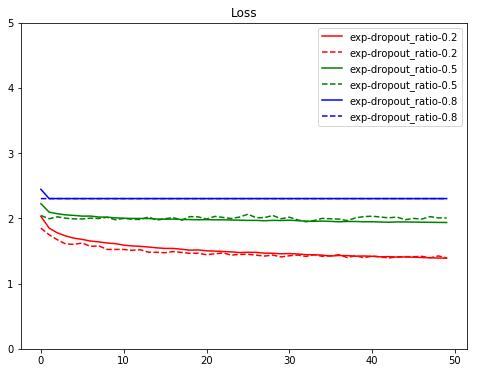

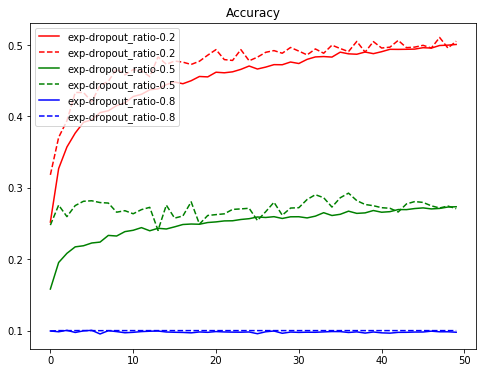

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()